### Домашнее задание к лекции «Задачи классификации и кластеризации»

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
iris = load_iris()
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)

2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [4]:
iris_pd = iris_pd[['sepal length (cm)', 'sepal width (cm)']]
variety = iris.target

3. Разделите данные на выборку для обучения и тестирования

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_pd, variety, test_size=0.25)

4. Постройте модель LDA

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_ = LinearDiscriminantAnalysis()
lda_.fit(X_train, y_train)

LinearDiscriminantAnalysis()

5. Визуализируйте предсказания для тестовой выборки и центры классов

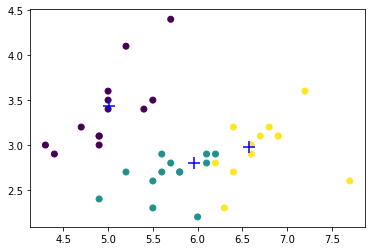

In [14]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda_.predict(X_test))
plt.scatter(lda_.means_[:, 0], lda_.means_[:, 1], c='b', s=150, marker='+')
plt.show()

6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [22]:
X_train.head()

,sepal length (cm),sepal width (cm)
80,5.5,2.4
123,6.3,2.7
37,4.9,3.6
129,7.2,3.0
121,5.6,2.8


7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

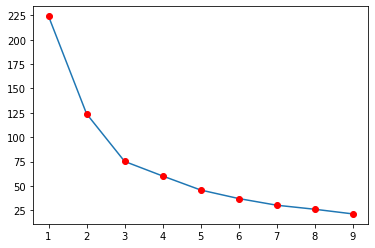

In [31]:
k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

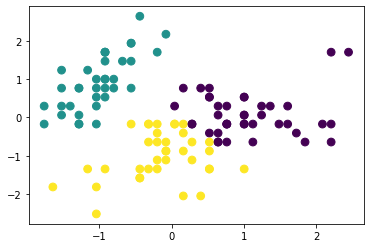

In [34]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)